Perceptron Implementation for the AND gate

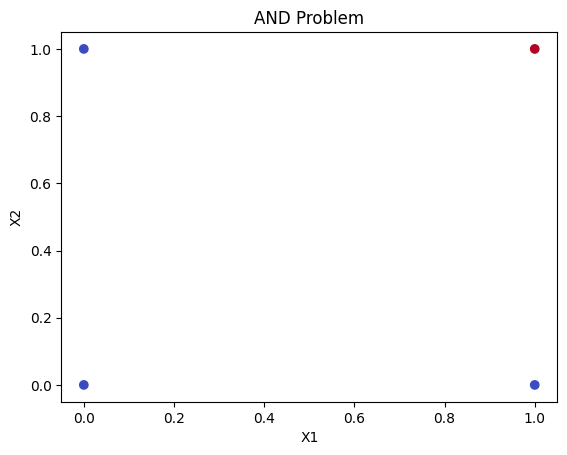

Initial results:
Accuracy: 0.25
Epoch 0, Accuracy: 0.25
Epoch 10, Accuracy: 1.00
Epoch 20, Accuracy: 0.75
Epoch 30, Accuracy: 0.75
Epoch 40, Accuracy: 1.00
Epoch 50, Accuracy: 1.00
Epoch 60, Accuracy: 1.00
Epoch 70, Accuracy: 1.00
Epoch 80, Accuracy: 1.00
Epoch 90, Accuracy: 1.00
Test results:
Accuracy: 1.00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[0],[0],[1]])

# plot the data
plt.scatter(X[:,0], X[:,1], c=Y[:,0], cmap='coolwarm')
plt.title('AND Problem')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

def input_summation(X, W):
    """
    Calculate the input sum for the perceptron.
    """
    return np.dot(X, W)

def activation_function(input_sum):
    """
    Apply the sigmoid activation function.
    """
    return 1 / (1 + np.exp(-input_sum))

def perceptron(X, W):
    """
    Perceptron function that combines input summation and activation function.
    """
    input_sum = input_summation(X, W)
    return activation_function(input_sum)


# define weights and add the bias term
W = np.random.rand(3, 1)  # 2 inputs + 1 bias
# print(W.shape)  # should be (3, 1)
X_bias = np.c_[np.ones((X.shape[0], 1)), X]  # add bias term to input data

Init_results = perceptron(X_bias, W)
print("Initial results:")
Init_accuracy = accuracy_score(Y, np.round(Init_results))
print(f"Accuracy: {Init_accuracy:.2f}")

def train_perceptron(X, Y, W, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the given data and labels.
    """
    for epoch in range(epochs):
        input_sum = input_summation(X_bias, W)
        output = activation_function(input_sum) # forward pass / forward propagation
        error = Y - output
        W += learning_rate * (X.T.dot(error)) # update weights / back propagation

        if epoch % 10 == 0:
            accuracy = accuracy_score(Y, np.round(output))
            print(f"Epoch {epoch}, Accuracy: {accuracy:.2f}")
    return W


# Train the perceptron
W_trained = train_perceptron(X_bias, Y, W, learning_rate=0.1, epochs=100)

# Test the trained perceptron
test_results = perceptron(X_bias, W_trained)
print("Test results:")
accuracy = accuracy_score(Y, np.round(test_results))
print(f"Accuracy: {accuracy:.2f}")

In [15]:
import numpy as np
from sklearn.metrics import accuracy_score

X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
Y = np.array([[0],
              [0],
              [0],
              [1]])  # AND output
Y = Y.reshape(-1,1)  # Y to match output shape
print(Y.shape)

# Create a simple perceptron
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.random.rand(input_size + 1)  # +1 for bias
        self.weights = self.weights.reshape(-1, 1)
        self.learning_rate = learning_rate

    def activation(self, x):
        # sigmoid activation function
        return 1 / (1 + np.exp(-x))

    def forward_propagation(self, x):
        # Add bias term
        x = np.concatenate((np.ones((x.shape[0],1)), x), axis=1)  # Add bias input
        # Weighted sum
        z = x.dot(self.weights)  # Dot product with weights
        # Activation function
        return self.activation(z)
    
    def backward_propagation(self, x, y, output):
        # Calculate error
        error = y - output
        x = np.concatenate((np.ones((x.shape[0],1)), x), axis=1)
        # Update weights
        self.weights += self.learning_rate * (x.T.dot(error))  # Add bias input

    def train(self, X, Y, epochs):
        for epoch in range(epochs):
            output = self.forward_propagation(X)
            self.backward_propagation(X, Y, output)

            if epoch % 10 == 0:
                error = np.mean(np.abs(Y - self.forward_propagation(X)))
                print(f'Epoch {epoch}, Error: {error}')

p = Perceptron(input_size=2, learning_rate=0.1)

# initial accuracy
print("Initial accuracy:", accuracy_score(Y, np.round(p.forward_propagation(X))))

# Train the perceptron
p.train(X, Y, epochs=100)

# final accuracy
print("Final accuracy:", accuracy_score(Y, np.round(p.forward_propagation(X))))


(4, 1)
Initial accuracy: 0.25
Epoch 0, Error: 0.5670572892045075
Epoch 10, Error: 0.43427244750112337
Epoch 20, Error: 0.3814328721034531
Epoch 30, Error: 0.347166395354238
Epoch 40, Error: 0.32003567947686207
Epoch 50, Error: 0.29738956032897734
Epoch 60, Error: 0.2781105711548467
Epoch 70, Error: 0.26147785069825713
Epoch 80, Error: 0.24696051273728734
Epoch 90, Error: 0.23415604310491525
Final accuracy: 1.0


Lets try the XOR

In [16]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
Y = np.array([[0],
              [1],
              [1],
              [0]])  # XOR output

Y = Y.reshape(-1,1)  # Y to match output shape

p = Perceptron(input_size=2, learning_rate=0.1)

# initial accuracy
print("Initial accuracy:", accuracy_score(Y, np.round(p.forward_propagation(X))))

# Train the perceptron
p.train(X, Y, epochs=100)

# final accuracy
print("Final accuracy:", accuracy_score(Y, np.round(p.forward_propagation(X))))


Initial accuracy: 0.5
Epoch 0, Error: 0.5000051473351863
Epoch 10, Error: 0.5000372293364039
Epoch 20, Error: 0.500000586262949
Epoch 30, Error: 0.49999812115448095
Epoch 40, Error: 0.49999886564586127
Epoch 50, Error: 0.4999994394761958
Epoch 60, Error: 0.4999997391363778
Epoch 70, Error: 0.49999988425139996
Epoch 80, Error: 0.4999999520736712
Epoch 90, Error: 0.49999998259056094
Final accuracy: 0.5


Use tensorflow

In [21]:
# Make perceptron with tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import accuracy_score

# Create a simple perceptron model using Keras
model = Sequential()
model.add(Dense(5, input_dim=3, activation='relu'))  # Hidden layer with 5 neurons
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.3), loss=BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 5)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26 (104.00 B)

 Trainable params: 26 (104.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
import numpy as np

X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
Y = np.array([[0],
              [1],
              [1],
              [0]])  # XOR output

Y = Y.reshape(-1,1)  # Y to match output shape

X_bias = np.c_[np.ones((X.shape[0], 1)), X]  # add bias term to input data

model.fit(X_bias, Y, epochs=500, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_bias, Y, verbose=0)
print(f"Final accuracy: {accuracy:.2f}")

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.7264
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.2500 - loss: 0.7411
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5000 - loss: 0.7388
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.5000 - loss: 0.6796
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.7500 - loss: 0.6183
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7500 - loss: 0.6105
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.7500 - loss: 0.5982
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.7500 - loss: 0.5621
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.2500 - loss: 0.5843
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.7500 - loss: 0.5180
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.7500 - loss: 0.4977
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 1.0000 - loss

# Torch

In [28]:
# Simple FFNN with torch
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import accuracy_score
import numpy as np

# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # First layer
        self.fc2 = nn.Linear(hidden_size, output_size)  # Output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Activation function for the first layer
        x = torch.sigmoid(self.fc2(x))  # Sigmoid activation for the output layer
        return x

# Create the model
input_size = 2
hidden_size = 5
output_size = 1

model = SimpleNN(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Prepare the data
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
Y = np.array([[0],
              [1],
              [1],
              [0]])  # XOR output
Y = Y.reshape(-1,1)  # Y to match output shape

X = torch.FloatTensor(X)  # Convert to PyTorch tensor
Y = torch.FloatTensor(Y)  # Convert to PyTorch tensor

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, Y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Test the model
with torch.no_grad():
    test_outputs = model(X)
    predicted = (test_outputs > 0.5).float()  # Convert probabilities to binary output
    accuracy = accuracy_score(Y.numpy(), predicted.numpy())
    print(f'Final accuracy: {accuracy:.2f}')


Epoch [10/100], Loss: 0.6913
Epoch [20/100], Loss: 0.6808
Epoch [30/100], Loss: 0.6655
Epoch [40/100], Loss: 0.6446
Epoch [50/100], Loss: 0.6190
Epoch [60/100], Loss: 0.5888
Epoch [70/100], Loss: 0.5566
Epoch [80/100], Loss: 0.5219
Epoch [90/100], Loss: 0.4833
Epoch [100/100], Loss: 0.4423
Final accuracy: 1.00


# DL vs ML

In [25]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

data = load_iris()
X = data.data
Y = data.target

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X, Y)
Y_pred = dt.predict(X)
accuracy = accuracy_score(Y, Y_pred)
print(f"Decision Tree Classifier Accuracy: {accuracy:.2f}")

Decision Tree Classifier Accuracy: 1.00


In [27]:
model = Sequential()
model.add(Dense(20, input_dim=4, activation='relu'))  # Hidden layer with 5 neurons
model.add(Dense(3, activation='softmax'))  # Output layer with 3 neurons (for 3 classes)
model.compile(optimizer=Adam(learning_rate=0.3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X, Y, epochs=500, verbose=1)
# Evaluate the model
loss, accuracy = model.evaluate(X, Y, verbose=0)
print(f"Final accuracy: {accuracy:.2f}")

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 20)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 3)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163 (652.00 B)

 Trainable params: 163 (652.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.3464 - loss: 5.4557
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5027 - loss: 1.2566
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6254 - loss: 0.9589
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6701 - loss: 0.7582
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7257 - loss: 0.5278 
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7779 - loss: 0.4419 
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8323 - loss: 0.3914
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9023 - loss: 0.3165
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9724 - loss: 0.2761 
Epoch 10/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9607 - loss: 0.2469
Epoch 11/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9811 - loss: 0.2113
Epoch 12/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9559 -

# MNIST

In [31]:
from sklearn.datasets import load_digits

data = load_digits()
print(data.DESCR)
X = data.data
Y = data.target

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

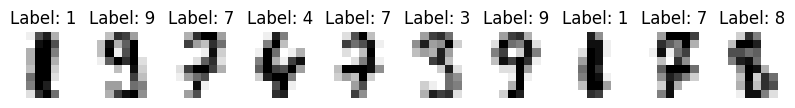

In [32]:
# View some samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
import numpy as np

def plot_digits(X, Y, n=10):
    fig, axes = plt.subplots(1, n, figsize=(10, 3))
    for i in range(n):
        ax = axes[i]
        ax.imshow(X[i].reshape(8, 8), cmap=cm.gray_r)
        ax.set_title(f"Label: {Y[i]}")
        ax.axis('off')
    plt.show()

# Plot some random samples
indices = random.sample(range(len(X)), 10)
plot_digits(X[indices], Y[indices], n=10)

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
Y_pred = dt.predict(x_test)
accuracy = accuracy_score(y_test, Y_pred)
print(f"Decision Tree Classifier Accuracy: {accuracy:.2f}")

Decision Tree Classifier Accuracy: 0.84


In [39]:
# Simple FFNN with tf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model = Sequential()
model.add(Dense(64, input_dim=64, activation='relu'))  # Hidden layer with 64 neurons
model.add(Dense(10, activation='softmax'))  # Output layer with 10 neurons (for 10 classes)
model.compile(optimizer=Adam(learning_rate=0.01), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
model.summary()
model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=1)
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Final accuracy: {accuracy:.2f}")

c:\Users\engsm\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,810 (18.79 KB)

 Trainable params: 4,810 (18.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4948 - loss: 2.9979
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9394 - loss: 0.1792
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9535 - loss: 0.1411
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9752 - loss: 0.0872
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9866 - loss: 0.0539
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9894 - loss: 0.0342
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9932 - loss: 0.0302
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9930 - loss: 0.0281
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9911 - loss: 0.0279
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9943 - loss: 0.0187
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9907 - loss: 0.0232
Epoch 12/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: